<i>STATUS: Draft<i>

In [61]:
import numpy as np
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from IPython.display import Image
from IPython.display import YouTubeVideo
import sys


In the last notebook, we covered the first 3 HTM school videaos, SDRs, notion of sparsity. We now can move to overlap sets. At the same time, we created some helper functions so let's list them now: 

In [37]:
def create_randominsed_sdr(x_limit, y_limit, population, one_dimensional = False):
    sdr = set()
    
    if one_dimensional:
        while len(sdr) < population:
            sdr.add(np.random.randint(low=1, high=x_limit))
    
    else:                
        while len(sdr) < population:
            sdr.add((np.random.randint(low=1, high=x_limit),np.random.randint(low=1, high=y_limit)))
    
                
    return(list(sdr))

def create_axis_for_sdr(ax, x_limit, y_limit, population, label):
    
    label_add = np.round((population / (x_limit * y_limit)) * 100, 2)
    label = label + ' (Sparsity: {}%)'.format(label_add)
    
    ax.set_xlabel(label)
    ax.set_xticks(range(int(x_limit)))
    ax.set_yticks(range(int(y_limit)))
    [ax.xaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(x_limit))]
    [ax.yaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(y_limit))]
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(color='k', linestyle='-', linewidth=.5)
    
    return(ax)

def compute_union_and_overlap(SDR1_on_bits, SDR2_on_bits):
    union = list(set(SDR1_on_bits).union(SDR2_on_bits))
    overlap = list(set(SDR1_on_bits).intersection(SDR2_on_bits))
    
    return({"union": union, "overlap": overlap})

def create_and_compare_sdrs_over_multiple_iterations(iterations, sdr_size, population):
    # make this return averages
    sdr_unions_for_comparison = []
    sdr_overlaps_for_comparison = []
    for x in range(iterations):
        SDR1 = create_randominsed_sdr(np.sqrt(sdr_size), np.sqrt(sdr_size), population)
        SDR2 =create_randominsed_sdr(np.sqrt(sdr_size), np.sqrt(sdr_size), population)
        sdr_comparison = compute_union_and_overlap(SDR1, SDR2)
        sdr_unions_for_comparison.append(len(sdr_comparison['union']))
        sdr_overlaps_for_comparison.append(len(sdr_comparison['overlap']))
    print("Average union: ", str(sum(sdr_unions_for_comparison) / len(sdr_unions_for_comparison)))
    print("Average overlap: ", str(sum(sdr_overlaps_for_comparison) / len(sdr_overlaps_for_comparison)))
    return({"union_comparison": sdr_unions_for_comparison, "overlap_comparison": sdr_overlaps_for_comparison})
    
def randomly_flip_percentage_of_bits(SDR, array_size, percentage_to_flip):
    to_remove = int(percentage_to_flip * len(SDR))
    randomised_SDR = np.random.shuffle(SDR)
    del SDR[0:to_remove]
    noise = create_randominsed_sdr(np.sqrt(array_size), np.sqrt(array_size), to_remove)
    sdr_with_noise = noise + SDR
    return(sdr_with_noise)



THe next video we introduces us so SDR Overlap sets and subsampling

In [44]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vU2OZdgBXAQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

We haven't yet come to terms with what exactly the relationship between a neoron and SDR is. Specifically, why is an SDR as feasible representation of the neuron? Consider the image below of piramidal neuron, along side the Numenta representation. 

IMAGE of Pyram neuron

We can think of the pyramidal neuron in the neocortex as a complex pattern recog system, tha that receives streams of SDRs from atpyical dendrites, as per: 

IMAGE FROM JG 

Thi bits in teh SDR come from a number of places: higher levels in heirachy, basil dentries, context and proximal dentries, lower level and sensory lots of different sdrs. A neoron wil laccept information and decide to fire, and the plays a role in othe SDRs...but turning its bit on. 

2 ways to look, from pramidal neoron, observe all sdrs deciding when it fires....and also plays a part in part of SDRS - by fiuring and turns bit on when it recognises 

Every bit reps a neuon/neorn identiy

THink of similiar time stamps, neorons firuing


If we accept that SDRs can represent some information but this information is arbitrary, one critical consideration is to recognise information is the same or similiar. This goes directly to the combintatorial aspect of SDRs and asks, given 2 SDRs how can I determine if they are match and how much can I degrade the and have it still feasibly be a match? 

To put this in context, let's reintroduce our  formula, $n$ is the number of bits or capacity of the array, $w$ is the population. In the previous notebook I used $n = 1024$ (the total available bits, capcity of $2^{10}$. We used a double value with a $w$ of 41 (around 2% sparsity). 

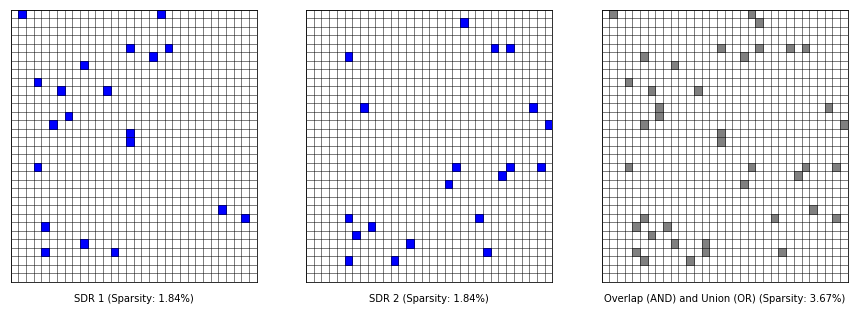

In [45]:
sdr_size = 1024
population = 20
label = str(np.round(sdr_size/population, 3))

specs1 = create_randominsed_sdr(np.sqrt(sdr_size), np.sqrt(sdr_size), population)
specs2 = create_randominsed_sdr(np.sqrt(sdr_size), np.sqrt(sdr_size), population)

sdr_comparison = compute_union_and_overlap(specs1, specs2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1 = create_axis_for_sdr(ax1, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, population, "SDR 1")
ax2 = create_axis_for_sdr(ax2, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, population, "SDR 2")
ax3 = create_axis_for_sdr(ax3, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, len(sdr_comparison['union']), "Overlap (AND) and Union (OR)")

SDR1 = [ax1.add_patch(Rectangle(specs1[i], 1, 1, color="blue")) for i in range(len(specs1))]
SDR2 = [ax2.add_patch(Rectangle(specs2[i], 1, 1, color="blue")) for i in range(len(specs2))]
union = [ax3.add_patch(Rectangle(sdr_comparison['union'][i], 1, 1, color="gray")) for i in range(len(sdr_comparison['union']))]
overlap = [ax3.add_patch(Rectangle(sdr_comparison['overlap'][i], 1, 1, color="orange")) for i in range(len(sdr_comparison['overlap']))]




We also explored the idea of a overlap and threshold. So here I have a second SDR, and there there some likliehood that 1 or more bits may share same positions in the array. In this sense they would overlap. 

But there is another way of looking at it. What if wanted to consider, given my SDR 1, and set some threshold, rather than finding out how my SDR2 threshold, how many possible SDR would meet this critieria. So this would involve some threshold, finding all possible sets.  This would be dependent on threshold. Another way of looking at this, is to ask if I have a given, SDR, as per above, and I 

To explore further let's introduce a new formula, to calculate the <b>Overlap Set</b> of an SDR:

$$  |\Omega_x(n, w, b| = \binom{w_0}{b} \times \binom{n - w_0}{w_1 - b}  $$

The first thing to note in this formula is that there are 2 values for $w$, $w_0$ and $w_1$. These are both the same thing, however $w_0$ is the population of the SDR which I want to consider all other SDRs too. The $w_2$ variable is the population of all the other SDRs that I am considering. 

Note that here we have  and now introduce a new variable $b$. This variable is the number of overlap bits that. I am saying that I accept there are this number of ways to get a match. 

Another way to think about this formula is on-bits and off-bits. THe right hand side, $\binom{w_0}{b}$ tells me about on-bit space: the number of ways in the onbit space ($b$), I can organise $w_0$ bits given. 

THis formula is (conditional probability?). Given the condition SDR and its overlap, how many spaces can be occupied. Beyond that it is simply the binomial coeffient.

Its very easy to create this function in python. Let's do it now: 

$$  |\Omega_x(n, w, b| = \binom{w_x}{b} \times \binom{n - w_x}{w - b}  $$


In [5]:
# overap - is "spaces"
# offbits - only 1 way all offbits can can fit 

def compute_overlap_set_cardinality(n, w0, w1, b, provide_summary = True):
    on_bit_space = sp.binomial(w0, b)
    off_bit_space = sp.binomial(n - w0, w1 - b)
    overlap_set = on_bit_space * off_bit_space
    if provide_summary:
        print("Given a capcity of", str(w0), "bits in the on-bit space, the number of ways to arrange ", str(b), "on-bits: ", on_bit_space)
        print("Given a capacity", str(n - w0), "bits in the off-bit space, the number of ways to arrange", str(w1 - b), "off-bits: ", off_bit_space)
        print("Number of SDRs that will match w0: ", overlap_set)
    return(overlap_set)

We can provide the function with an array size, population or $w$ values for and our $b$ value to match. Let's try it with the following parameters

In [6]:
count_of_overlap_sets = compute_overlap_set_cardinality(600,40, 40, 39)

Given a capcity of 40 bits in the on-bit space, the number of ways to arrange  39 on-bits:  40
Given a capacity 560 bits in the off-bit space, the number of ways to arrange 1 off-bits:  560
Number of SDRs that will match w0:  22400


So we have $22400$ possible sets that can be produced that would meet the threshold. Let's try it for another set of inputs: 

In [93]:
count_of_overlap_sets = compute_overlap_set_cardinality(600,40, 40, 30)

Given a capcity of 40 bits in the on-bit space, the number of ways to arrange  30 on-bits:  847660528
Given a capacity 560 bits in the off-bit space, the number of ways to arrange 10 off-bits:  770938160845996996216
Number of SDRs that will match w0:  653493848478066740498868562048


It quickly get's large. I accupte that 30 out of 40 bits will match my original SDR, than the number that will match will very large.  

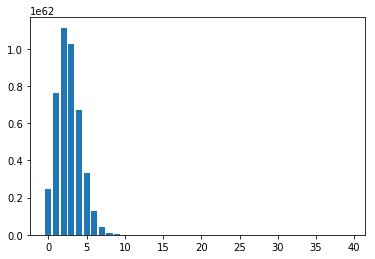

In [27]:
p = plt.bar(range(0, 40), [compute_overlap_set_cardinality(600,40, 40, i, provide_summary=False) for i in range(0, 40)])

Another thing to consider So if I get 30 bits out of my 40 what are the odds that I don't have the 40? We can compute this by dividing the overlap set cardinatoity with how unique the original SDR is. Lets create a Python function for this:

In [23]:
def compute_likelihood_of_false_postive(n, w0, w1, b):
    return(float(compute_overlap_set_cardinality(n, w0, w1, b) / sp.binomial(n, w0)))

In [24]:
compute_likelihood_of_false_postive(600, 40, 40, 30)

Given a capcity of 40 bits in the on-bit space, the number of ways to arrange  30 on-bits:  847660528
Given a capacity 560 bits in the off-bit space, the number of ways to arrange 10 off-bits:  770938160845996996216
Number of SDRs that will match w0:  653493848478066740498868562048


1.5074171020764367e-33

So this says if I return and SDR that has 30 of the 40 bits, this is the likelihood at it not my original SDR. 

What we are stargint so see here is binomial coefficent kicking in. It is so unlikely that it won't be a match, that we can start to rely on, statistical, things that are so astromomically unlikely to happen, that we can at the scale at which we are operating essentially understand that they will never happen. 

This idea of how unlikely somethnig is to happen is an idea that we can extend event further. Recall that when we create an SDR, we dont need so store it. Instead storing the capacity each 1, we can just store the the indices. 

In [79]:
SDR_off_bits = [1 for i in np.arange(1024 - 103)]
SDR_on_bits = [0 for i in np.arange(103)]
SDR = SDR_off_bits + SDR_on_bits
sys.getsizeof(SDR)

8256

Python will add some overhead to the way it does this, but storing  8 bits for each number: 

In [89]:
8256 / 1024

8.0625

In [90]:
SDR_indices = create_randominsed_sdr(1024, 0, 20, one_dimensional=True)
sys.getsizeof(SDR_indices)

288

In [91]:
sys.getsizeof(SDR_indices) / 20

14.4

But this suggests. But what else can we do. What if instead of storing all of these bits, I just took a sample - so first original, them sample, then second random, then another random SDR, then compare overlap

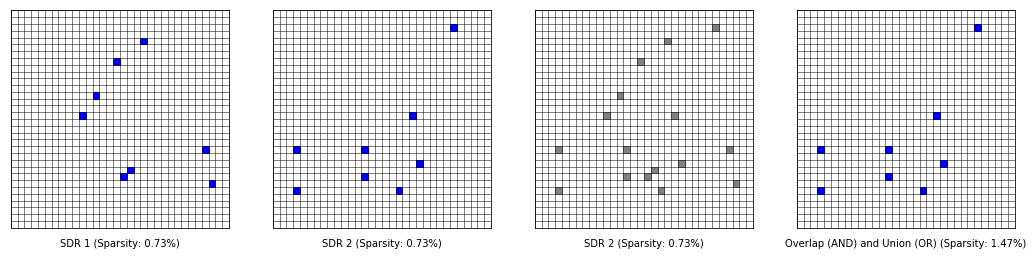

In [101]:
sdr_size = 1024
population = 8
label = str(np.round(sdr_size/population, 3))

specs1 = create_randominsed_sdr(np.sqrt(sdr_size), np.sqrt(sdr_size), population)
specs2 = create_randominsed_sdr(np.sqrt(sdr_size), np.sqrt(sdr_size), population)

sdr_comparison = compute_union_and_overlap(specs1, specs2)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))

ax1 = create_axis_for_sdr(ax1, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, population, "SDR 1")
ax2 = create_axis_for_sdr(ax2, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, population, "SDR 2")
ax3 = create_axis_for_sdr(ax3, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, population, "SDR 2")
ax4 = create_axis_for_sdr(ax4, np.sqrt(sdr_size) + 1, np.sqrt(sdr_size) + 1, len(sdr_comparison['union']), "Overlap (AND) and Union (OR)")

SDR1 = [ax1.add_patch(Rectangle(specs1[i], 1, 1, color="blue")) for i in range(len(specs1))]
SDR2 = [ax2.add_patch(Rectangle(specs2[i], 1, 1, color="blue")) for i in range(len(specs2))]
SDR3 = [ax4.add_patch(Rectangle(specs2[i], 1, 1, color="blue")) for i in range(len(specs2))]
union = [ax3.add_patch(Rectangle(sdr_comparison['union'][i], 1, 1, color="gray")) for i in range(len(sdr_comparison['union']))]
overlap = [ax3.add_patch(Rectangle(sdr_comparison['overlap'][i], 1, 1, color="orange")) for i in range(len(sdr_comparison['overlap']))]



Formula - left side is onbit space, right side is off bits.....we choose an n and w, and 

We are saying....given any SDR ( we ill call "x") that has an n and w, the the OVERLAP SET is the number of SDRS (Total) tha thave same n, specific w with a specific number fo bits of overlap with x

So we are interested in some SDR, and then all other SDRs in relationship to it that form an overlap set, where this set is the size

for example we choose some SDR = 600

we know its w/population and we can change this. we also have a value b which is how many bits we require for the overlap

So if we have 40 onbits, and we require b to be 40, an exact match of bits in teh sapce, there is 1 way to to this. 

But if we require

Cardinality of overlap set, divided by uniquenss of original SDR

w

<div style="background:#99ddff; color:black; padding: 10px">
<b>Add to these notes:</b>
    
What becomes apparent after doing is that it needs more rigor around the code. Ideally I want to pass in size SDR get specs, get overlap and union, set a threshold. It makes more sense to have and SDR class in python which can then have attributes
</div>

We have covered alot in this notebook